# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data.groupby('children')['debt'].sum()

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64

Первичным подсчетом количества людей с задолженностью в зависимости от количества детей видно, что с увеличением количества детей растет вероятность своевроменного погашения кредита.<br>
Однако на этот результат опираться нельзя - нужно вычислить процентное соотношение для каждой группы

In [23]:
data_grouped = data.groupby('children').agg({'debt': ['count', 'sum']})
data_grouped['ratio'] = data_grouped['debt']['sum'] / data_grouped['debt']['count']
data_grouped.sort_values(by='ratio', ascending=False)

debt           ratio
          count   sum          
children                       
4            41     4  0.097561
2          2052   194  0.094542
1          4808   444  0.092346
3           330    27  0.081818
0         14091  1063  0.075438
5             9     0  0.000000

children
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: children, dtype: object

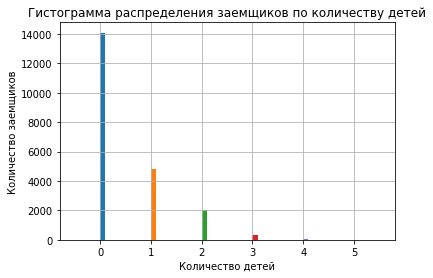

In [39]:
import pylab as pl
pl.title("Гистограмма распределения заемщиков по количеству детей")
pl.xlabel("Количество детей")
pl.ylabel("Количество заемщиков")
data.groupby('children')['children'].hist()

**Вывод:** <br>
В результате видно, что первичное предположение было ошибочным.<br>
Данные по количеству детей распределены неравномерно: заемщиков без детей 14000, а с пятью детьми - 9. По этой выборке сделать объективный вывод о наличии зависимости между количеством детей и возвратом кредита в срок сложно.<br>
Однако на самых многочисленных группах с 0, 1 и 2 детьми видно, что с увеличением количества детей растет вероятность просрочить платеж.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data.groupby('family_status')['debt'].sum()

family_status
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
гражданский брак         385
женат / замужем          927
Name: debt, dtype: int64

In [26]:
data_grouped = data.groupby('family_status').agg({'debt': ['count', 'sum']})
data_grouped['ratio'] = data_grouped['debt']['sum'] / data_grouped['debt']['count']
data_grouped.sort_values(by='ratio', ascending=False)

debt          ratio
                       count  sum          
family_status                              
Не женат / не замужем   2796  273  0.097639
гражданский брак        4134  385  0.093130
женат / замужем        12261  927  0.075606
в разводе               1189   84  0.070648
вдовец / вдова           951   63  0.066246

family_status
Не женат / не замужем    AxesSubplot(0.125,0.125;0.775x0.755)
в разводе                AxesSubplot(0.125,0.125;0.775x0.755)
вдовец / вдова           AxesSubplot(0.125,0.125;0.775x0.755)
гражданский брак         AxesSubplot(0.125,0.125;0.775x0.755)
женат / замужем          AxesSubplot(0.125,0.125;0.775x0.755)
Name: family_status, dtype: object

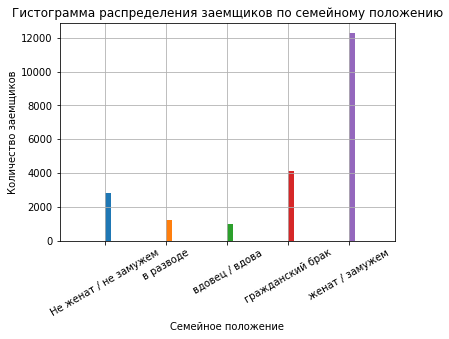

In [40]:
import pylab as pl
pl.title("Гистограмма распределения заемщиков по семейному положению")
pl.xlabel("Семейное положение")
pl.ylabel("Количество заемщиков")
data.groupby('family_status')['family_status'].hist(xrot=30)

**Вывод:** <br>
Ситуация с распределением данных в зависимости от семейного положения выглядит схожим образом с количеством детей, но минимальное значение распределения - 951 у вдовцов и вдов, что является, на мой взгляд, приемлимым, чтобы делать выводы.<br>
Да, зависимость между семейным положением и возвратом кредита в срок есть. Предпочтительнее кредитовать женатых, замужних и тех, кто ранее состоял в браке.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data.groupby('total_income_category')['debt'].sum()

total_income_category
A       2
B     354
C    1353
D      21
E       2
Name: debt, dtype: int64

In [29]:
data_grouped = data.groupby('total_income_category').agg({'debt': ['count', 'sum']})
data_grouped['ratio'] = data_grouped['debt']['sum'] / data_grouped['debt']['count']
data_grouped.sort_values(by='ratio', ascending=False)

debt           ratio
                       count   sum          
total_income_category                       
E                         22     2  0.090909
C                      15921  1353  0.084982
A                         25     2  0.080000
B                       5014   354  0.070602
D                        349    21  0.060172

total_income_category
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
D    AxesSubplot(0.125,0.125;0.775x0.755)
E    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_income_category, dtype: object

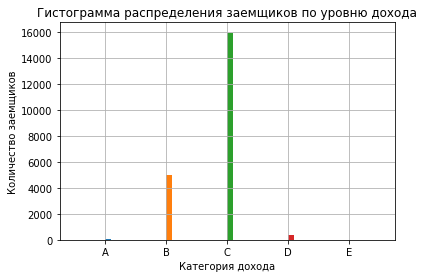

In [41]:
import pylab as pl
pl.title("Гистограмма распределения заемщиков по уровню дохода")
pl.xlabel("Категория дохода")
pl.ylabel("Количество заемщиков")
data.groupby('total_income_category')['total_income_category'].hist()

**Вывод:** <br>
Данные распределены неравномерно с явным преобладанием групп С и B. Поэтому анализу будут подвергаться только данные две группы.<br>
С уменьшением уровня дохода растет вероятность просрочить платеж по кредиту.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data.groupby('purpose_category')['debt'].sum()

purpose_category
операции с автомобилем      400
операции с недвижимостью    780
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64

In [32]:
data_grouped = data.groupby('purpose_category').agg({'debt': ['count', 'sum']})
data_grouped['ratio'] = data_grouped['debt']['sum'] / data_grouped['debt']['count']
data_grouped.sort_values(by='ratio', ascending=False)

debt          ratio
                          count  sum          
purpose_category                              
операции с автомобилем     4279  400  0.093480
получение образования      3988  369  0.092528
проведение свадьбы         2313  183  0.079118
операции с недвижимостью  10751  780  0.072551

purpose_category
операции с автомобилем      AxesSubplot(0.125,0.125;0.775x0.755)
операции с недвижимостью    AxesSubplot(0.125,0.125;0.775x0.755)
получение образования       AxesSubplot(0.125,0.125;0.775x0.755)
проведение свадьбы          AxesSubplot(0.125,0.125;0.775x0.755)
Name: purpose_category, dtype: object

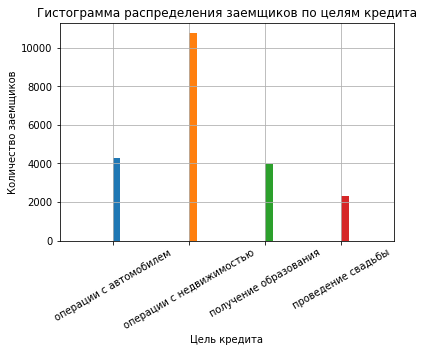

In [42]:
import pylab as pl
pl.title("Гистограмма распределения заемщиков по целям кредита")
pl.xlabel("Цель кредита")
pl.ylabel("Количество заемщиков")
data.groupby('purpose_category')['purpose_category'].hist(xrot=30)

**Вывод:** <br>
Цель кредита влияет на вероятность погашения кредита в срок. <br><br>
Самые стабильные кредитополучатели - те, кто берет кредит для операций с недвижимостью.<br> Предполагемая причина: недвижимость приобретают либо для проживания, либо в коммерческих целях. Неуплата кредита в срок грозит, соответственно, выселением из квартиры/дома и передачи имущества банку, либо лишение источника дохода. Данные причины являются сильными мотиваторами для погашения задолженности в срок<br><br>
На втором месте - кредит на свадьбу.<br> Предполагаю, задолженность погашается за счет подаренных средств<br><br>
Самые нестабильные кредитополучатели те, кто берут кредит на образование и операции с автомобилем - вероятность задолженности у них примерно одинаковая.<br>
Это может быть связано с тем, что автомобили весьма неликвидный товар - он значительно теряет в цене после покупки и продолжает терять стоимость с каждым годом экспллуатации.<br>
Что касается образования, человек с ним может ошибиться и не найти работу, чтобы его погасить(или искать слишком долго)

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* <br>
Причины появления пропусков в исходных данных делятся на две группы:
1) **Технические ошибки**: повреждение файла при выгрузке/копировании, сбой базы данных или сервиса, который собирает данные и т.д.<br>
2) Ошибки связанные с **человеческим фактором**: человек описался, отвлекся, заполнил значение в другой системе исчислений и т.д.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* <br>
Есть 4 возможных варианта заполнения пропусков в количественных переменных - поправьте, если забыл про какие-нибудь)))<br><br>
Медианное, среднее, максимальное, минимальное.
Медианное значение лучше подходит, т.к. не учитывает единичные выбросы в данных.<br>
Рассмотрим на примере

In [34]:
from statistics import median, mean

test_list = [100] * 48
test_list.append(100_000)
test_list.append(5)
print(f'Медиана: {median(test_list)}')
print(f'Среднее: {mean(test_list)}')
print(f'Максимальное: {max(test_list)}')
print(f'Минимальное: {min(test_list)}')

Медиана: 100.0
Среднее: 2096.1
Максимальное: 100000
Минимальное: 5


Как видно из результата, медианное значение лучше отражает картину в выборке

### Шаг 4: общий вывод.

Проведено исследование надежности заемщиков банка.<br>
На этапе предобработки данных первым делом были выявлены пропуски в в данных - пропущены значения в общем трудовом стаже(days_employed) и ежемесячном доходе(total_income).<br>
Пропуски в столбцах total_income и days_employed заменены медианным значением в соответствии с типом занятости заемщика.<br>
Также в ходе исследования в этих солбцах устранены аномалии, а именно отрицательные значения.<br>
Из выборки удалены строки, где количество детей указано 20 или -1.<br>
Обработаны дубликаты в выборке, в частности, в стобце с образованием все данные приведены к одному(нижнему) регистру.<br>
Для наглядности и удобства данные из столбцов с ежемесячным доходом и целью кредита распределены по соответствующим категориям.
Категории дохода:
1) 0–30000 — 'E'<br>
2) 30001–50000 — 'D'<br>
3) 50001–200000 — 'C'<br>
4) 0001–1000000 — 'B'<br>
5) 1000001 и выше — 'A'<br>
Категории целей кредита:
1) операции с автомобилем<br>
2) операции с недвижимостью<br>
3) проведение свадьбы<br>
4) получение образования<br><br>
По результатам проведенного анализа, можно сделать вывод, что самыми стабильными плательщиками являются люди, когда-либо состоящие в браке и берущие кредит для операций с недвижимостью или проведения свадьбы.<br>
Зависимость между возвратом кредита в срок и количеством детей так же, как и с уровнем дохода, выявлена частична - данных по заемщикам с 3+ детьми и типом дохода A, D, E недостаточно для анализа.<br>
На самых многочисленных группах с 0, 1 и 2 детьми видно, что с увеличением количества детей растет вероятность просрочить платеж.<br>
С уменьшением уровня дохода растет вероятность просрочить платеж по кредиту - вывод на основании данных о заемщиках с типом дохода B и С.
